In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

plt.rcParams["font.family"] = "Times New Roman"

In [11]:
df = pd.read_csv('LambdaVMetaEpSizeFinal2.csv')

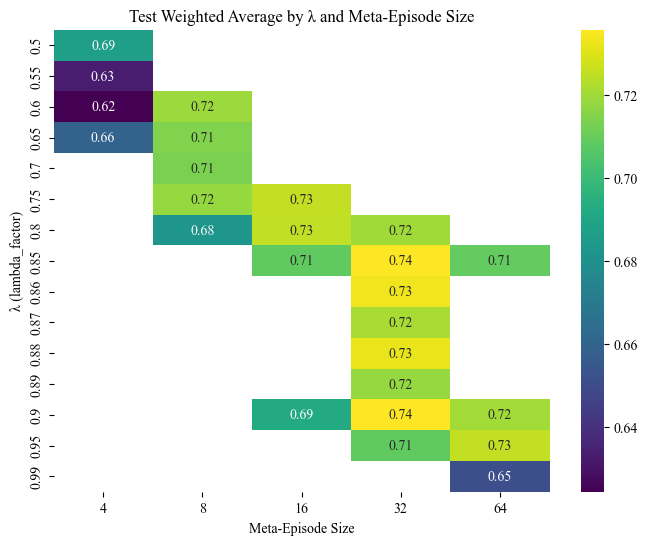

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# assume df is your results dataframe
df["test_weighted"] = 0.7*df["test_av_usefulness"] + 0.3*df["test_av_NEUTRALITY"]

pivot = df.pivot_table(
    index="lambda_factor",
    columns="meta_ep_size",
    values="test_weighted",
    aggfunc="mean"
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="viridis")
plt.title("Test Weighted Average by λ and Meta-Episode Size")
plt.ylabel("λ (lambda_factor)")
plt.xlabel("Meta-Episode Size")
plt.show()


In [29]:
df["test_weighted"] = 0.7*df["test_av_usefulness"] + 0.3*df["test_av_NEUTRALITY"]

# average across repeats
grouped = df.groupby(["lambda_factor", "meta_ep_size"], as_index=False)["test_weighted"].mean()

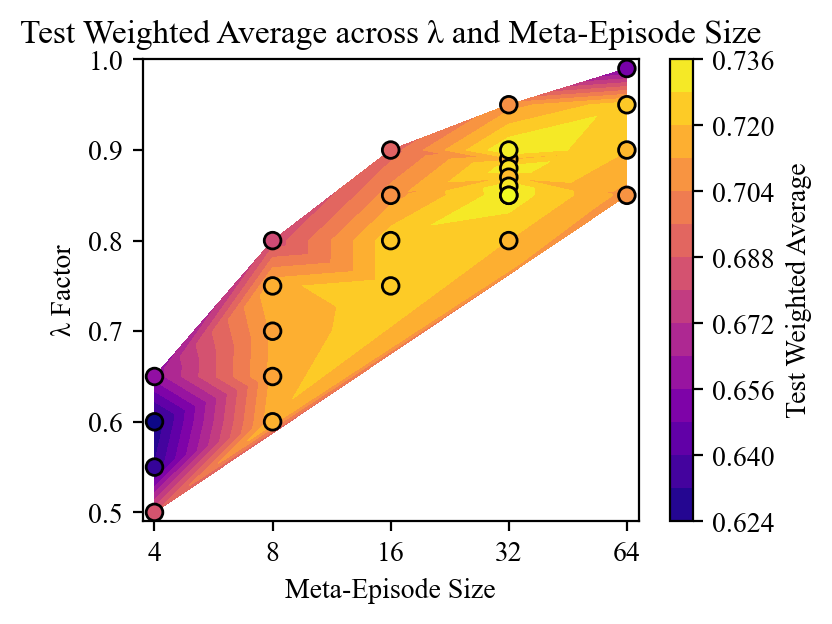

In [47]:
import matplotlib.tri as tri
import numpy as np

x = np.log2(df["meta_ep_size"])
y = df["lambda_factor"]
z = df["test_weighted"]

plt.figure(figsize=(4,3), dpi=200)
triang = tri.Triangulation(x, y)
plt.tricontourf(triang, z, levels=14, cmap="plasma")
plt.colorbar(label="Test Weighted Average")
plt.scatter(x, y, c=z, edgecolor="k", cmap="plasma")
plt.xlabel("Meta-Episode Size")
plt.xticks(ticks=np.log2([4,8,16,32,64]), labels=[4,8,16,32,64])
plt.xlim(1.9, 6.1)

plt.ylabel("λ Factor")
plt.ylim(0.49, 1.0)
plt.title("Test Weighted Average across λ and Meta-Episode Size")
plt.show()


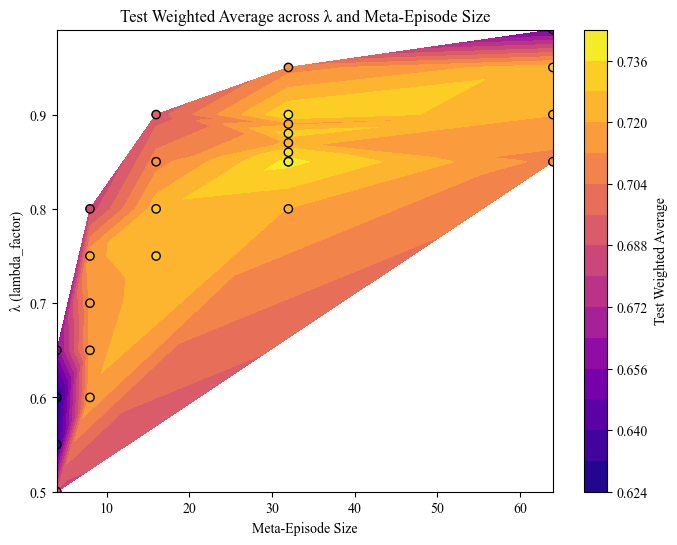

In [28]:
import matplotlib.tri as tri
import numpy as np

x = df["meta_ep_size"]
y = df["lambda_factor"]
z = df["test_weighted"]

plt.figure(figsize=(8,6))
triang = tri.Triangulation(x, y)
plt.tricontourf(triang, z, levels=14, cmap="plasma")
plt.colorbar(label="Test Weighted Average")
plt.scatter(x, y, c=z, edgecolor="k", cmap="plasma")
plt.xlabel("Meta-Episode Size")
plt.ylabel("λ (lambda_factor)")
plt.title("Test Weighted Average across λ and Meta-Episode Size")
plt.show()
